## Forecast_Evaluation

In [1]:
import pandas as pd
from fbprophet import Prophet
%matplotlib inline

In [2]:
df = pd.read_csv(r'F:\DS\Time_Series_Analysis\[ FreeCourseWeb.com ] Udemy - Python for Time Series Data Analysis\01. Introduction\UDEMY_TSA_FINAL\Data\Miles_Traveled.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
DATE                588 non-null object
TRFVOLUSM227NFWA    588 non-null float64
dtypes: float64(1), object(1)
memory usage: 9.3+ KB


In [4]:
df.head()

,DATE,TRFVOLUSM227NFWA
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


In [5]:
df.columns = ['ds','y']

In [6]:
# YOU CAN SAFELY IGNORE THIS COPY WARNING
# CHECK THE DOCS LINK FOR MORE INFO ON THIS COPY WARNING
df['ds'] = pd.to_datetime(df['ds'])

In [7]:
df.head()

,ds,y
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


In [10]:
pd.plotting.register_matplotlib_converters()

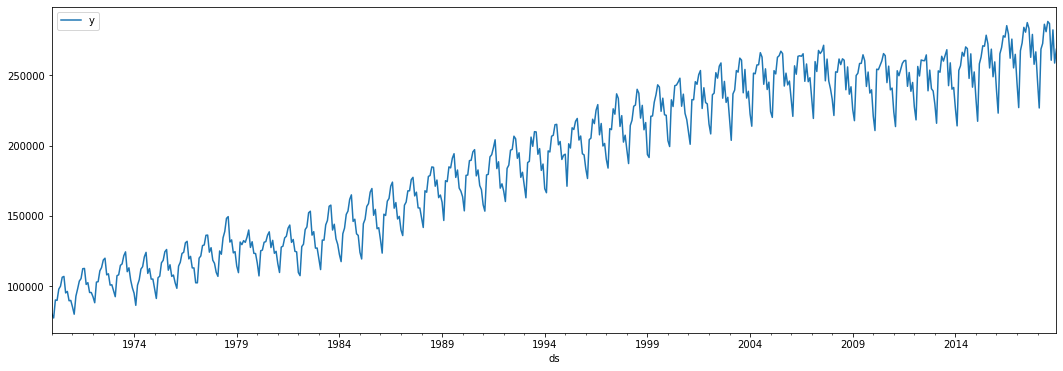

In [11]:
df.plot(x='ds',y='y',figsize=(18,6))

In [12]:
len(df)

588

In [13]:
len(df) - 12

576

In [14]:
train = df.iloc[:576]
test = df.iloc[576:]

In [15]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=12,freq='MS')
forecast = m.predict(future)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [16]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
583,2018-08-01,263219.378669,273821.914469,285397.346644,263169.473422,263246.646713,16451.125033,16451.125033,16451.125033,16451.125033,16451.125033,16451.125033,0.0,0.0,0.0,279670.503702
584,2018-09-01,263357.665883,255775.471283,267162.579953,263271.176970,263407.274200,-1666.545411,-1666.545411,-1666.545411,-1666.545411,-1666.545411,-1666.545411,0.0,0.0,0.0,261691.120472
585,2018-10-01,263491.492218,262822.792283,274460.913939,263371.103426,263574.815117,5310.587893,5310.587893,5310.587893,5310.587893,5310.587893,5310.587893,0.0,0.0,0.0,268802.080112
586,2018-11-01,263629.779432,249520.636085,261111.469753,263472.897296,263750.368345,-8203.436940,-8203.436940,-8203.436940,-8203.436940,-8203.436940,-8203.436940,0.0,0.0,0.0,255426.342492
587,2018-12-01,263763.605767,251064.074955,262437.363117,263573.946591,263917.696647,-6916.514689,-6916.514689,-6916.514689,-6916.514689,-6916.514689,-6916.514689,0.0,0.0,0.0,256847.091078


In [17]:
test.tail()

,ds,y
583,2018-08-01,286608.0
584,2018-09-01,260595.0
585,2018-10-01,282174.0
586,2018-11-01,258590.0
587,2018-12-01,268413.0


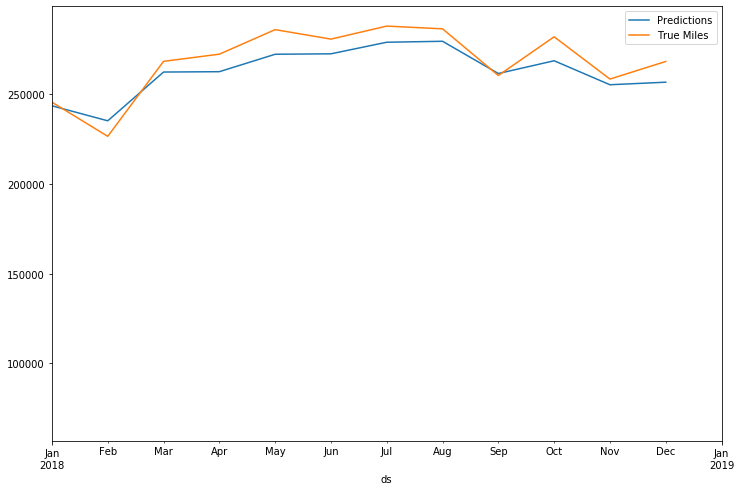

In [18]:
ax = forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))

test.plot(x='ds',y='y',label='True Miles',legend=True,ax=ax,xlim=('2018-01-01','2019-01-01'))

In [19]:
from statsmodels.tools.eval_measures import rmse

In [20]:
predictions = forecast.iloc[-12:]['yhat']

In [21]:
predictions

576    243683.663737
577    235311.776917
578    262511.200772
579    262708.863987
580    272429.495856
581    272679.913346
582    279136.474721
583    279670.503702
584    261691.120472
585    268802.080112
586    255426.342492
587    256847.091078
Name: yhat, dtype: float64

In [22]:
test['y']

576    245695.0
577    226660.0
578    268480.0
579    272475.0
580    286164.0
581    280877.0
582    288145.0
583    286608.0
584    260595.0
585    282174.0
586    258590.0
587    268413.0
Name: y, dtype: float64

In [23]:
rmse(predictions,test['y'])

8750.25052083061

In [24]:
test.mean()

y    268739.666667
dtype: float64

## Prophet_Diagnostics

In [25]:
from fbprophet.diagnostics import cross_validation,performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [26]:
len(df)

588

In [27]:
len(df)/12

49.0

The initial period should be long enough to capture all of the components of the model, in particular seasonalities and extra regressors: at least a year for yearly seasonality, at least a week for weekly seasonality, etc...

In [28]:
# help(pd.Timedelta)

In [29]:
# Initial 5 years training period
initial = 5 * 365
initial = str(initial) + ' days'
# Fold every 5 years
period = 5 * 365
period = str(period) + ' days'
# Forecast 1 year into the future
horizon = 365
horizon = str(horizon) + ' days'

In [30]:
df_cv = cross_validation(m, initial=initial, period=period, horizon = horizon)

INFO:fbprophet:Making 9 forecasts with cutoffs between 1976-12-11 00:00:00 and 2016-12-01 00:00:00


In [31]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1977-01-01,108479.087389,107044.777869,109942.762935,102445.0,1976-12-11
1,1977-02-01,102996.111525,101551.422727,104412.616017,102416.0,1976-12-11
2,1977-03-01,118973.318113,117529.543667,120421.954692,119960.0,1976-12-11
3,1977-04-01,120612.923709,119175.053795,122006.865897,121513.0,1976-12-11
4,1977-05-01,127883.031830,126464.490678,129366.443617,128884.0,1976-12-11


In [32]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
103,2017-08-01,273328.467970,267453.351237,278972.060188,283184.0,2016-12-01
104,2017-09-01,255447.843997,250003.154330,261280.998851,262673.0,2016-12-01
105,2017-10-01,262552.901413,256695.683982,268081.199645,278937.0,2016-12-01
106,2017-11-01,249204.331440,242991.932779,254926.406769,257712.0,2016-12-01
107,2017-12-01,250450.721819,244651.646608,256031.307069,266535.0,2016-12-01


In [33]:
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,coverage
0,52 days,2.437359e+07,4936.961190,4528.637861,0.027750,0.4
1,53 days,2.187095e+07,4676.638408,4262.628303,0.024999,0.4
2,54 days,1.842045e+07,4291.904691,3732.310696,0.020061,0.5
3,55 days,2.351247e+07,4848.965429,4271.125183,0.023241,0.4
4,57 days,2.115130e+07,4599.053997,3989.900860,0.021416,0.5
...,...,...,...,...,...,...
94,360 days,1.862165e+07,4315.281433,3775.153749,0.019707,0.5
95,361 days,1.777184e+07,4215.666214,3507.111932,0.018367,0.5
96,362 days,3.210247e+07,5665.904399,4435.117794,0.022175,0.4
97,364 days,3.022906e+07,5498.095592,4257.907114,0.021507,0.5


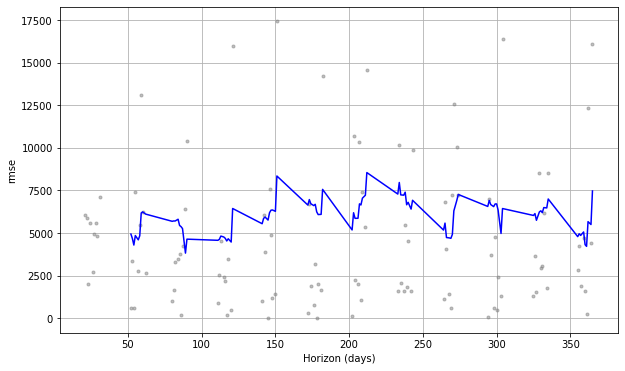

In [34]:
plot_cross_validation_metric(df_cv, metric='rmse');

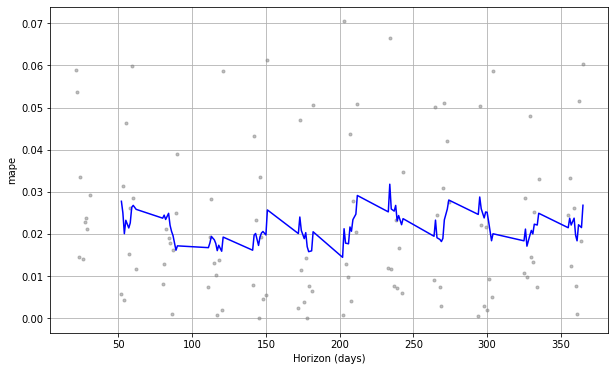

In [35]:
plot_cross_validation_metric(df_cv, metric='mape');